In [1]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

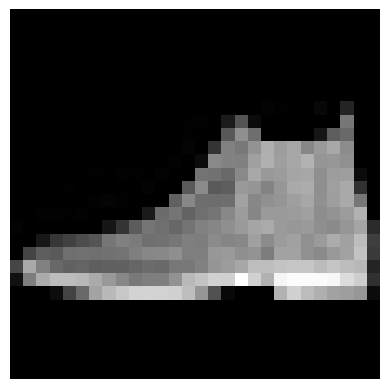

In [3]:
# Display the image 1
plt.imshow(x_test[0], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

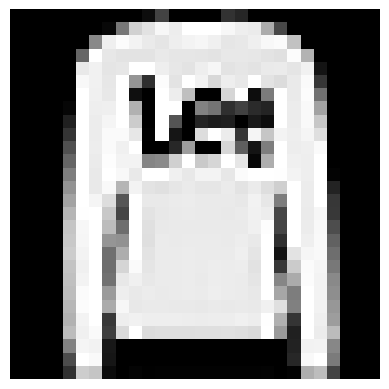

In [4]:
# Display the image 2
plt.imshow(x_test[1], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

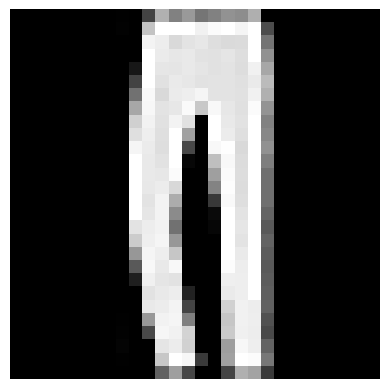

In [5]:
# Display the image 3
plt.imshow(x_test[2], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

In [6]:
# To categorical with y data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Create a simple CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, workers=10)

Epoch 1/10
750/750 [==============================] - 10s 13ms/step - loss: 0.5758 - accuracy: 0.7892 - val_loss: 0.4160 - val_accuracy: 0.8534
Epoch 2/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3560 - accuracy: 0.8706 - val_loss: 0.3389 - val_accuracy: 0.8778
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3032 - accuracy: 0.8893 - val_loss: 0.3189 - val_accuracy: 0.8850
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2684 - accuracy: 0.9028 - val_loss: 0.3065 - val_accuracy: 0.8851
Epoch 5/10
750/750 [==============================] - 10s 13ms/step - loss: 0.2481 - accuracy: 0.9091 - val_loss: 0.2709 - val_accuracy: 0.9017
Epoch 6/10
750/750 [==============================] - 9s 13ms/step - loss: 0.2288 - accuracy: 0.9159 - val_loss: 0.2668 - val_accuracy: 0.9049
Epoch 7/10
750/750 [==============================] - 9s 13ms/step - loss: 0.2086 - accuracy: 0.9238 - val_loss: 0.2531 - val_accuracy: 0.

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.2653 - accuracy: 0.9086
Test accuracy: 90.86%


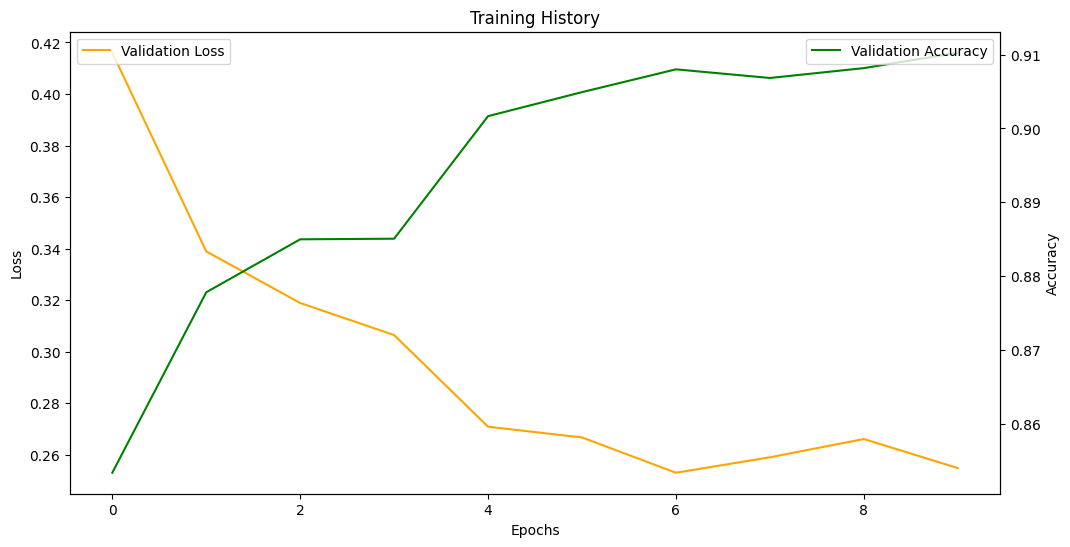

In [11]:
# Create the figure and the axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primeiro eixo y para Loss
ax1.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

# Second axis to accuracy
ax2 = ax1.twinx()
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_ylabel('Accuracy', color='black')
ax2.tick_params('y', colors='black')
ax2.legend(loc='upper right')

plt.title('Training History')
plt.show()